In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"plates.csv")
print(data.head())

   class id              filepaths   labels data set
0         0  train/ALABAMA/001.jpg  ALABAMA    train
1         0  train/ALABAMA/002.jpg  ALABAMA    train
2         0  train/ALABAMA/003.jpg  ALABAMA    train
3         0  train/ALABAMA/004.jpg  ALABAMA    train
4         0  train/ALABAMA/005.jpg  ALABAMA    train


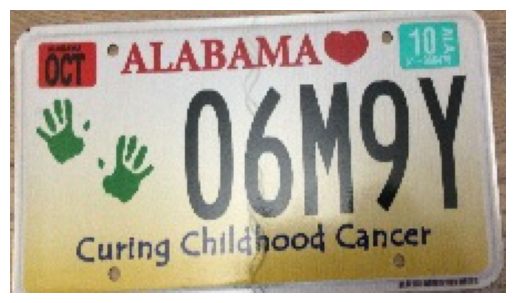

In [3]:
def load_and_preprocess_image(file_path):
    img = Image.open(file_path)
    img = np.array(img) / 255.0  
    return img

row = data.iloc[1] 
file_path = row['filepaths']
image = load_and_preprocess_image(file_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(128, activation='relu'))

model.add(Dense(56, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 111, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 109, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 26, 128)    

In [5]:
test_file_paths = data[data['data set'] == 'test']['filepaths'].tolist()
train_file_paths = data[data['data set'] == 'train']['filepaths'].tolist()
val_file_paths = data[data['data set'] == 'valid']['filepaths'].tolist()

train_labels = data[data['data set'] == 'train']['labels'].values
test_labels = data[data['data set'] == 'test']['labels'].values
val_labels = data[data['data set'] == 'valid']['labels'].values

train_images = []
for file_path in train_file_paths:
    image = load_and_preprocess_image(file_path)
    train_images.append(image)
train_images = np.array(train_images)

test_images = []
for file_path in test_file_paths:
    image = load_and_preprocess_image(file_path)
    test_images.append(image)
test_images = np.array(test_images)

val_images = []
for file_path in val_file_paths:
    image = load_and_preprocess_image(file_path)
    val_images.append(image)
val_images = np.array(val_images)


In [6]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Training images shape: (8161, 128, 224, 3)
Training labels shape: (8161,)
Testing images shape: (280, 128, 224, 3)
Testing labels shape: (280,)
Validation images shape: (280, 128, 224, 3)
Validation labels shape: (280,)


In [7]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

all_labels = data['labels'].values.reshape(-1, 1)
onehot_encoder.fit(all_labels)

train_labels_encoded = onehot_encoder.transform(train_labels.reshape(-1, 1))
test_labels_encoded = onehot_encoder.transform(test_labels.reshape(-1, 1))
val_labels_encoded = onehot_encoder.transform(val_labels.reshape(-1, 1))



C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Sample Training Images and Labels:


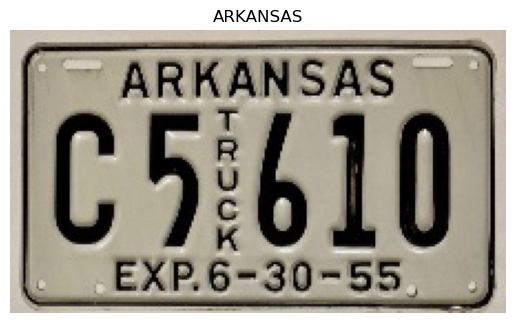

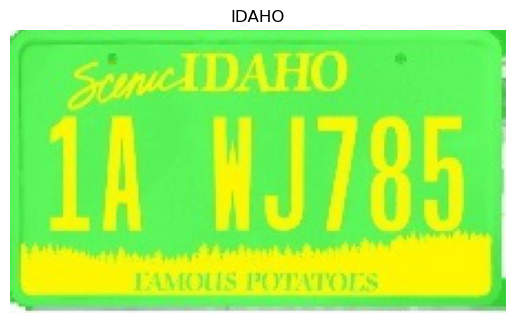

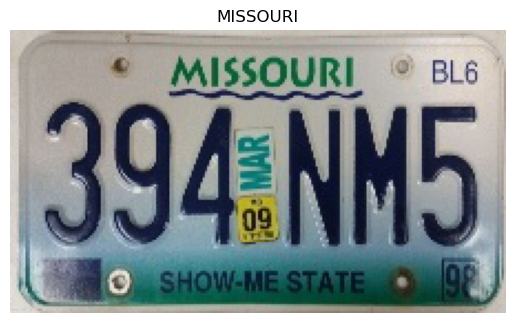

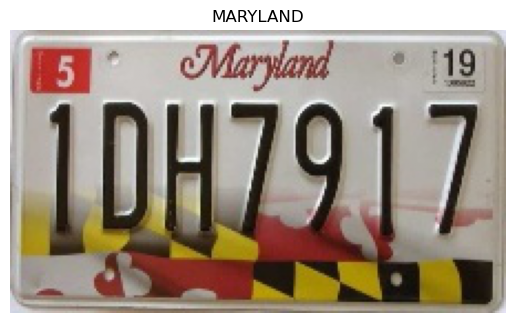

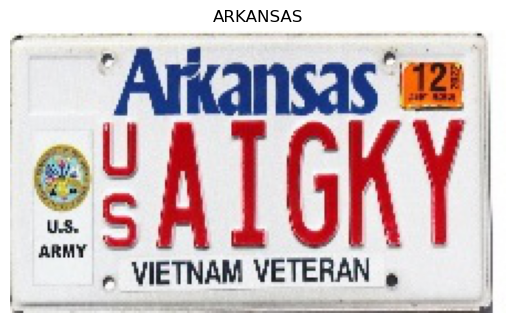

Sample Testing Images and Labels:


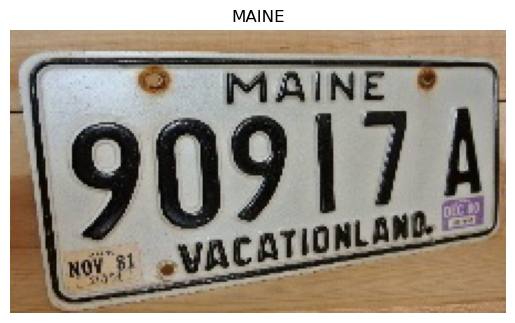

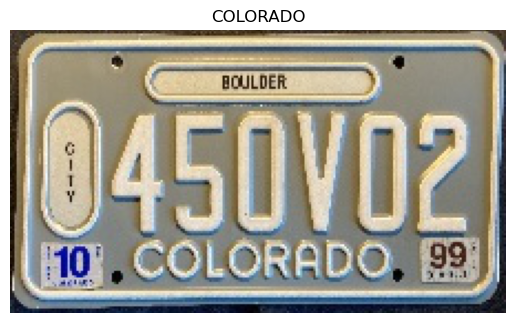

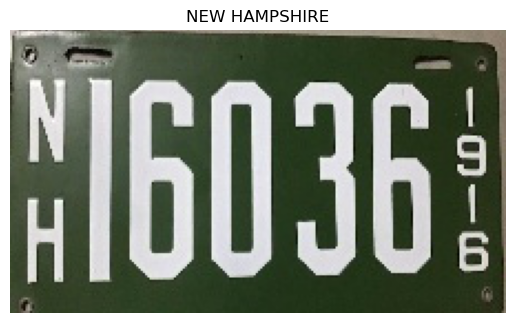

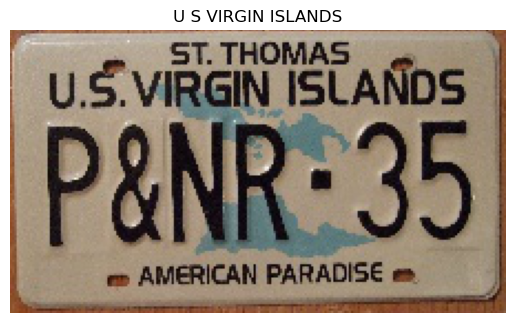

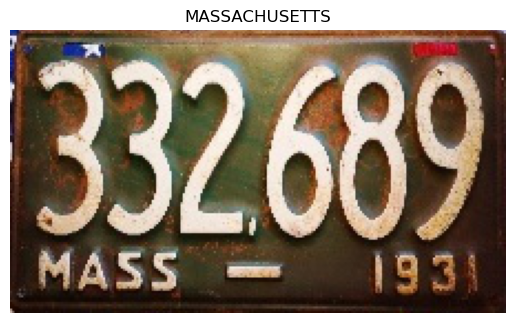

Sample Validation Images and Labels:


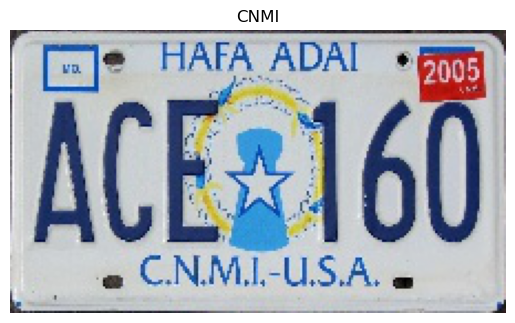

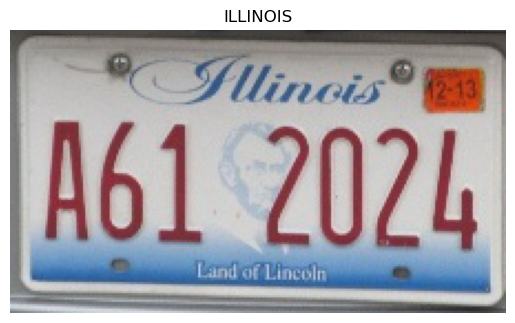

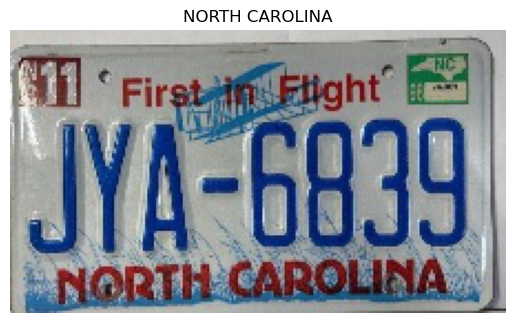

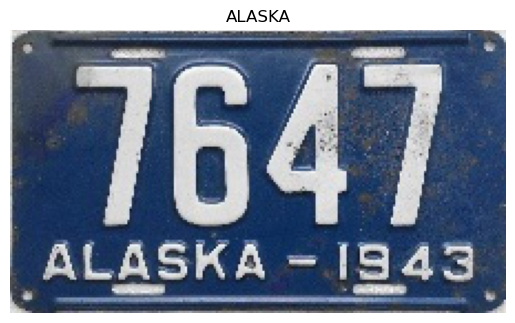

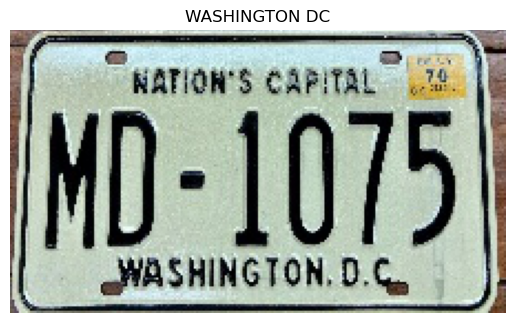

In [8]:
import random

def display_sample_images(images, labels, num_samples=5):
    indices = random.sample(range(len(images)), num_samples)
    for i in indices:
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
        plt.show()

print("Sample Training Images and Labels:")
display_sample_images(train_images, train_labels)

print("Sample Testing Images and Labels:")
display_sample_images(test_images, test_labels)

print("Sample Validation Images and Labels:")
display_sample_images(val_images, val_labels)


Epoch 1/15


256/256 [==============================] - 72s 274ms/step - loss: 4.0303 - accuracy: 0.0197 - val_loss: 4.0185 - val_accuracy: 0.0214
Epoch 2/15
256/256 [==============================] - 70s 275ms/step - loss: 3.8316 - accuracy: 0.0804 - val_loss: 3.2717 - val_accuracy: 0.2464
Epoch 3/15
256/256 [==============================] - 70s 275ms/step - loss: 3.0267 - accuracy: 0.2747 - val_loss: 2.5811 - val_accuracy: 0.4036
Epoch 4/15
256/256 [==============================] - 70s 275ms/step - loss: 2.3911 - accuracy: 0.4134 - val_loss: 2.2777 - val_accuracy: 0.4786
Epoch 5/15
256/256 [==============================] - 71s 276ms/step - loss: 1.9533 - accuracy: 0.5062 - val_loss: 1.9004 - val_accuracy: 0.5429
Epoch 6/15
256/256 [==============================] - 71s 276ms/step - loss: 1.5486 - accuracy: 0.5954 - val_loss: 1.7911 - val_accuracy: 0.5857
Epoch 7/15
256/256 [==============================] - 71s 277ms/step - loss: 1.2377 - accuracy: 0.6647 - val_loss: 1.7795 - val_

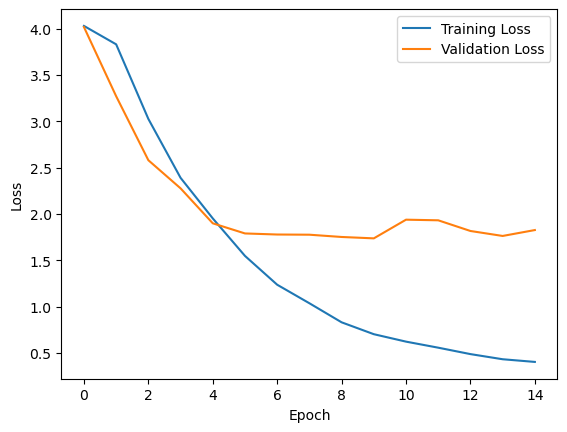

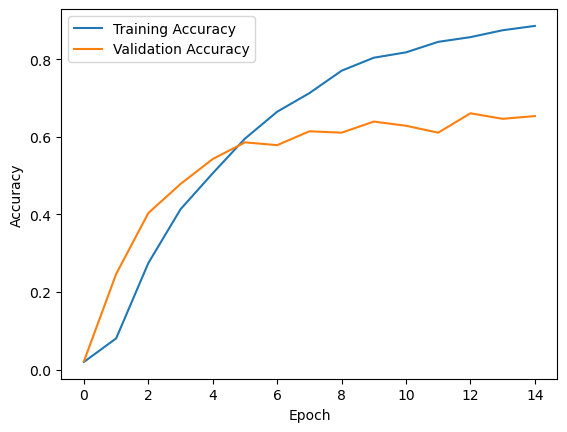

In [9]:
history = model.fit(
    train_images, train_labels_encoded,
    epochs=15, 
    validation_data=(val_images, val_labels_encoded)
)

test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



9/9 [==============================] - 1s 51ms/step


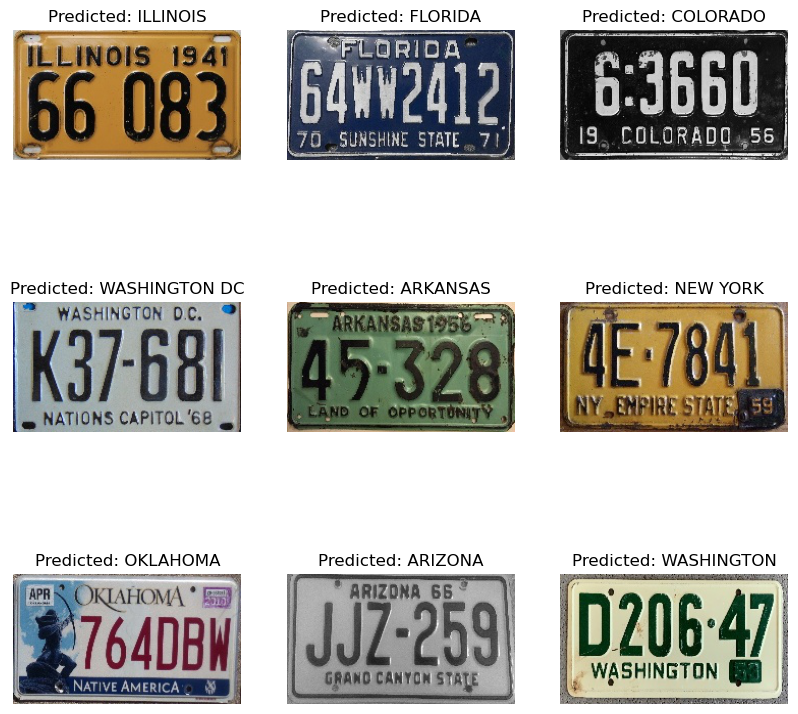

9/9 [==============================] - 1s 55ms/step - loss: 1.7741 - accuracy: 0.6429
Test Loss: 1.7740883827209473
Test Accuracy: 0.6428571343421936


In [10]:
test_file_paths = data[data['data set'] == 'test']['filepaths'].tolist()

test_images = []
for file_path in test_file_paths:
    image = load_and_preprocess_image(file_path)
    test_images.append(image)
test_images = np.array(test_images)


predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
num_images = len(test_images)
random_indices = random.sample(range(num_images), 9)  

for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx])
    predicted_label = np.argmax(predictions[idx])  
    predicted_label_name = test_labels[idx]  
    plt.title("Predicted: {}".format(predicted_label_name))
    plt.axis('off')

plt.show()

test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [11]:
model.save("your_model.h5")


C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
